In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print("Keys of iris_dataset : \n{}".format(iris_dataset.keys()))

Keys of iris_dataset : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [5]:
print("Target names : {}".format(iris_dataset['target_names']) )

Target names : ['setosa' 'versicolor' 'virginica']


In [6]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print("Type of data : {}".format(type(iris_dataset['data'])))

Type of data : <class 'numpy.ndarray'>


In [8]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [9]:
print("First five columns of data : \n{}".format(iris_dataset['data'][:5]))

First five columns of data : 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print("Type of target : {}".format(type(iris_dataset['target'])))

Type of target : <class 'numpy.ndarray'>


In [12]:
print("Shape of target : {}".format(iris_dataset['target'].shape))

Shape of target : (150,)


In [13]:
print("Target: \n{}".format(iris_dataset['target']))

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [15]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [16]:
print("X_test shape : {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape : (38, 4)
y_test shape: (38,)


In [17]:
iris_dataframe = pd.DataFormat(X_train, columns=iris_dataset.feature_names)
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins' : 20}, s=60, alpha=.8, camp=mglearn.cm3)

NameError: name 'pd' is not defined

In [18]:
import pandas as pd

In [19]:
pd

<module 'pandas' from '/Users/numa08/src/github.com/numa08/MachineLerningWithPython/venv/lib/python3.7/site-packages/pandas/__init__.py'>

In [20]:
pd.DataFormat

AttributeError: module 'pandas' has no attribute 'DataFormat'

In [25]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

/Users/numa08/src/github.com/numa08/MachineLerningWithPython/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


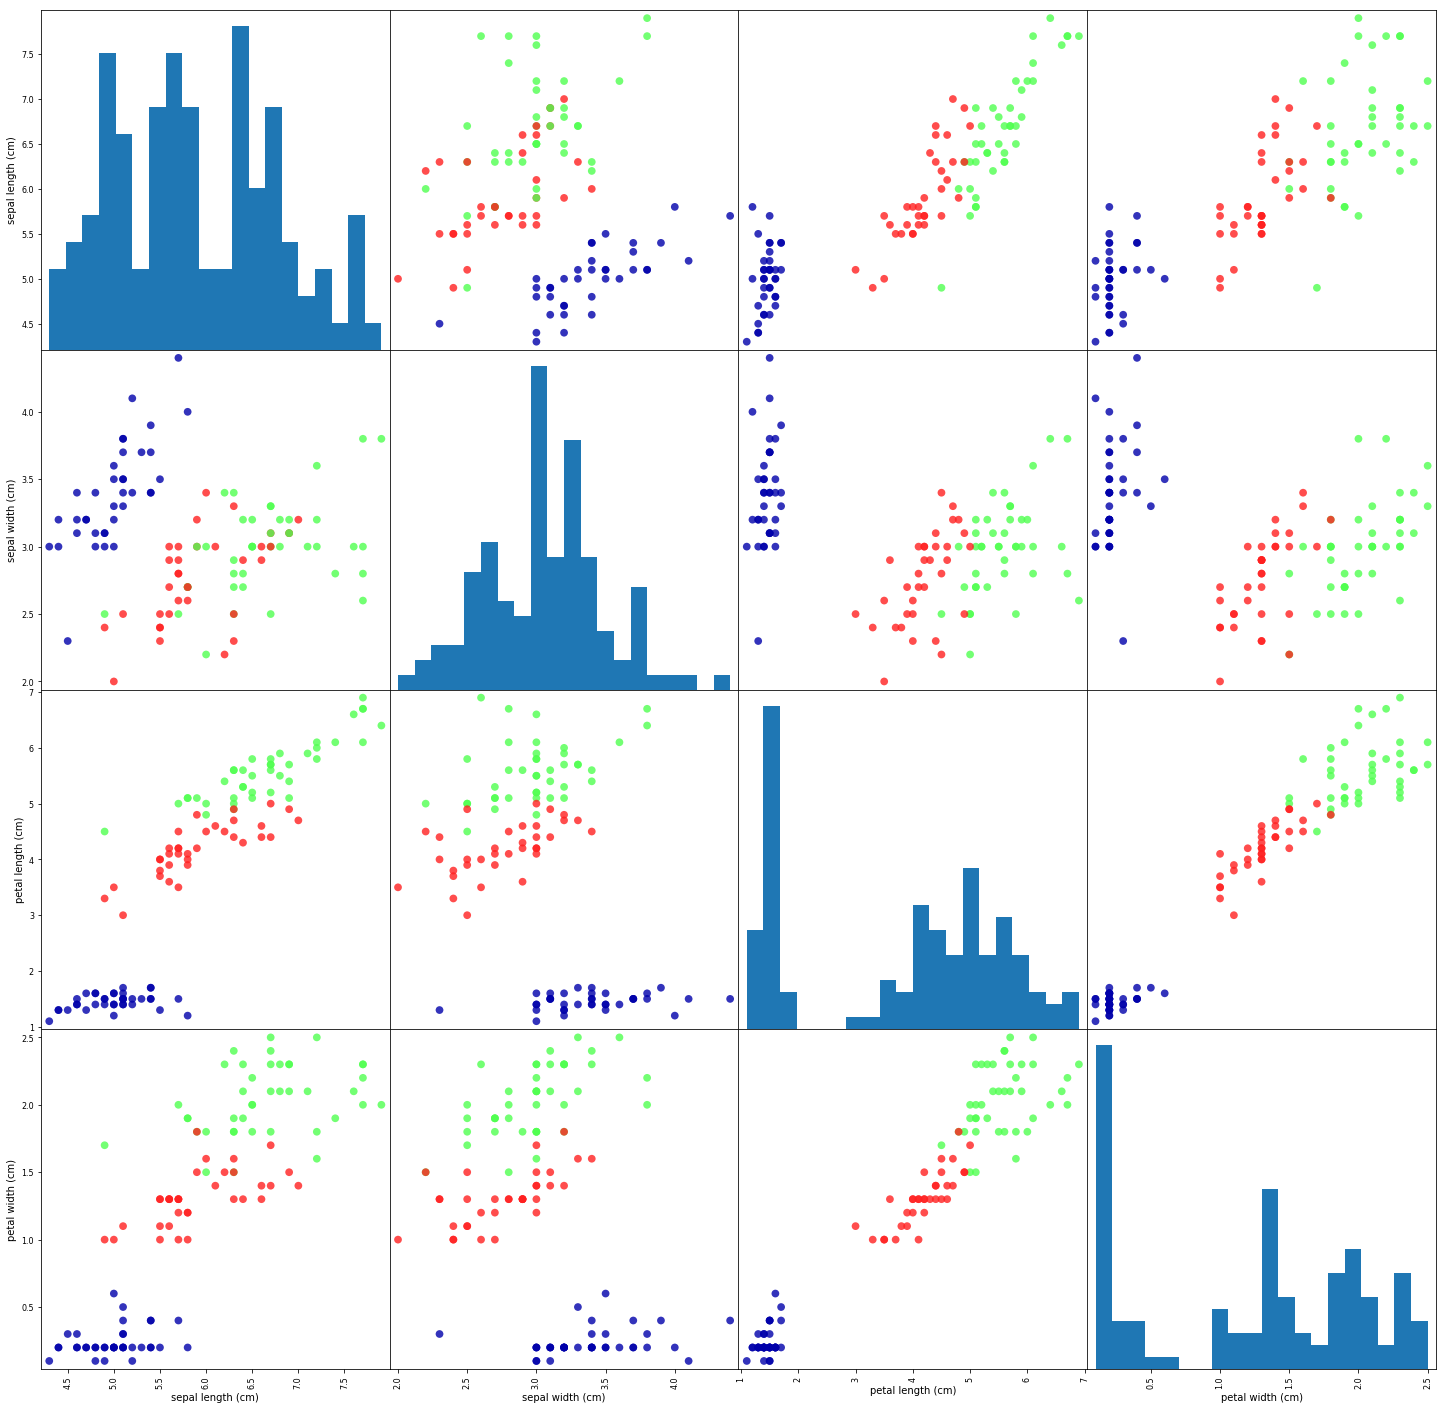

In [27]:
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(25, 25), marker='o',
                       hist_kwds={'bins' : 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [32]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
    iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [33]:
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [34]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [35]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
